In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
output = pd.read_csv('/content/drive/MyDrive/workspace/output.csv', index_col=False)
output

,ImageID,label,ans
0,000001_female_Asian_45/mask3.jpg,4,4
1,000001_female_Asian_45/mask5.jpg,4,4
2,000001_female_Asian_45/normal.jpg,16,16
3,000001_female_Asian_45/mask4.jpg,4,4
4,000001_female_Asian_45/incorrect_mask.jpg,10,10
...,...,...,...
18895,006959_male_Asian_19/normal.jpg,12,12
18896,006959_male_Asian_19/mask4.jpg,0,0
18897,006959_male_Asian_19/incorrect_mask.jpg,6,6
18898,006959_male_Asian_19/mask1.jpg,0,0


In [ ]:
wrong_output = output[output['label'] != output['ans']]
wrong_output

,ImageID,label,ans
107,000020_female_Asian_50/normal.jpg,16,10
109,000020_female_Asian_50/incorrect_mask.jpg,10,17
219,000039_female_Asian_57/normal.jpg,16,17
220,000039_female_Asian_57/mask4.jpg,4,5
222,000039_female_Asian_57/mask1.jpg,4,5
...,...,...,...
17899,006578_male_Asian_19/mask5.jpg,0,3
17900,006578_male_Asian_19/mask4.jpeg,0,3
17922,006582_female_Asian_20/incorrect_mask.jpeg,9,10
18626,006737_female_Asian_19/mask2.jpg,3,4


In [ ]:
def decode_multi_class(multi_class_label):
  mask_label = (multi_class_label // 6) % 3
  gender_label = (multi_class_label // 3) % 2
  age_label = multi_class_label % 3
  return mask_label, gender_label, age_label

In [ ]:
mask_gts = []
gender_gts = []
age_gts = []
mask_preds = []
gender_preds = []
age_preds = []

for i in range(len(wrong_output)) :
  mask_gt, gender_gt, age_gt = decode_multi_class(wrong_output['label'].values[i])
  mask_pred, gender_pred, age_pred = decode_multi_class(wrong_output['ans'].values[i])

  mask_gts.append(mask_gt)
  gender_gts.append(gender_gt)
  age_gts.append(age_gt)
  mask_preds.append(mask_pred)
  gender_preds.append(gender_pred)
  age_preds.append(age_pred)

print(f'Mask Error Rate : {(np.sum(np.array(mask_gts) != np.array(mask_preds)) / len(wrong_output)):.4f}')
print(f'Gender Error Rate : {(np.sum(np.array(gender_gts) != np.array(gender_preds)) / len(wrong_output)):.4f}')
print(f'Age Error Rate : {(np.sum(np.array(age_gts) != np.array(age_preds))/ len(wrong_output)):.4f}')

Mask Error Rate : 0.0502
Gender Error Rate : 0.1329
Age Error Rate : 0.8316


[ 6 25  3]


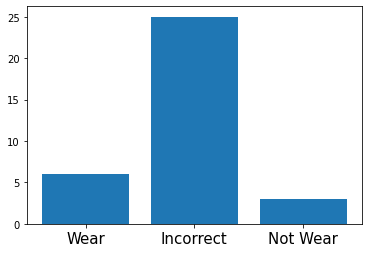

In [ ]:
np_mask_gts = np.array(mask_gts)
_, counts = np.unique(np_mask_gts[np.array(mask_gts) != np.array(mask_preds)], return_counts = True)
print(counts)
label = ['Wear', 'Incorrect', 'Not Wear']
index = np.arange(len(label))
plt.bar(index, counts)
plt.xticks(index, label, fontsize=15)
plt.show()

[51 39]


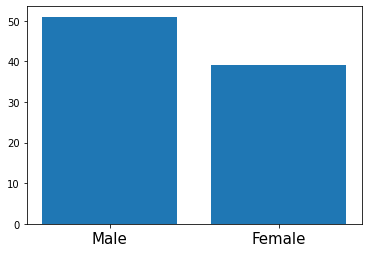

In [ ]:
np_gender_gts = np.array(gender_gts)
_, counts = np.unique(np_gender_gts[np.array(gender_gts) != np.array(gender_preds)], return_counts = True)
print(counts)
label = ['Male', 'Female']
index = np.arange(len(label))
plt.bar(index, counts)
plt.xticks(index, label, fontsize=15)
plt.show()

[ 79 311 173]


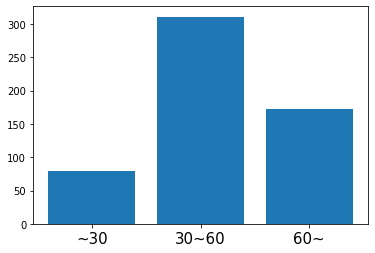

In [ ]:
np_age_gts = np.array(age_gts)
_, counts = np.unique(np_age_gts[np.array(age_gts) != np.array(age_preds)], return_counts = True)
print(counts)
label = ['~30', '30~60', '60~']
index = np.arange(len(label))
plt.bar(index, counts)
plt.xticks(index, label, fontsize=15)
plt.show()